In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow

In [52]:
data = pd.read_csv('data.csv')

In [53]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [54]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [61]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [62]:
data.shape[1]

179

In [63]:
data.index

RangeIndex(start=0, stop=11500, step=1)

In [64]:
y = data.iloc[:, -1]
y[:10]

0    4
1    1
2    5
3    5
4    5
5    5
6    4
7    2
8    1
9    4
Name: y, dtype: int64

In [65]:
X = data.iloc[:, :data.shape[1] - 1]
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [66]:
number_of_columns = X.shape[1]
number_of_rows = X.shape[0]
number_of_classes = len(np.unique(y))

In [67]:
number_of_classes

5

In [68]:
np.bincount(y)

array([   0, 2300, 2300, 2300, 2300, 2300], dtype=int64)

In [74]:
print('Raspodela po grupama: \n', y.value_counts())

Raspodela po grupama: 
 5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64


In [83]:
mean_by_classes = data.groupby(['y']).mean()
mean_by_classes.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
y,,,,,,,,,,,,,,,,,,,,,
1,-21.936522,-19.049130,-15.293913,-9.836087,-3.707391,2.730000,6.899565,7.425652,8.380870,10.773913,...,-7.266522,-9.714783,-15.909565,-22.383043,-26.424783,-26.221739,-25.830870,-25.043913,-24.548261,-24.016522
2,-7.710000,-8.148696,-8.020000,-8.050435,-7.776957,-8.220870,-8.597826,-9.210000,-9.217826,-9.347826,...,-7.979565,-8.483043,-8.967391,-9.067391,-8.924783,-8.592174,-8.524348,-8.558696,-8.187391,-8.147391
3,-9.207391,-9.276522,-9.968261,-10.634348,-11.172174,-11.559130,-11.797826,-12.013043,-12.132609,-12.249130,...,-13.590000,-13.332174,-13.218696,-12.789565,-12.366087,-11.320000,-10.455217,-9.757391,-9.418696,-8.935217
4,-12.726087,-12.410435,-12.272609,-12.096957,-12.083043,-12.349130,-13.064348,-13.419565,-13.441739,-13.147826,...,-13.428696,-13.636522,-14.114783,-14.404783,-14.251304,-14.109565,-13.653913,-13.082174,-12.791739,-12.914783
5,-6.326957,-5.673043,-5.380870,-5.097391,-5.309130,-5.618261,-5.950000,-6.218696,-6.378696,-6.871304,...,-5.229565,-5.562174,-5.941304,-6.072609,-6.377391,-6.573043,-6.760870,-7.083478,-7.183913,-6.964348


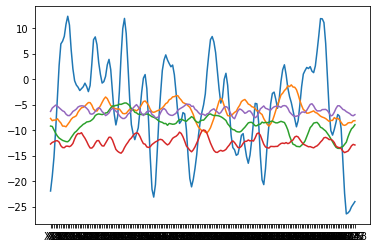

In [96]:
plt.plot(mean_by_classes.T)
plt.show()

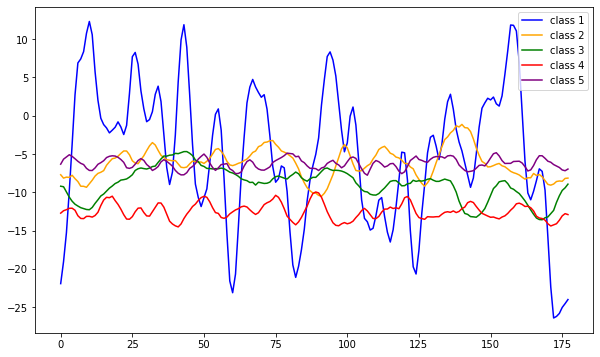

In [92]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize = (10, 6))
for i in range(number_of_classes):
    plt.plot(range(number_of_columns), mean_by_classes.iloc[i,:], c = colors[i], label = 'class ' + str(i+1))
plt.legend(loc = 'upper right')

In [98]:
std_by_classes = data.groupby(['y']).std()
std_by_classes.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
y,,,,,,,,,,,,,,,,,,,,,
1,342.361939,343.398782,337.489643,332.354833,332.211163,332.941638,332.899545,334.375084,334.534814,331.071853,...,342.095308,341.534693,345.740615,351.503084,351.184524,347.475865,339.650467,335.747017,335.244512,339.819309
2,95.525136,94.734737,93.716055,92.509248,91.004234,90.880780,91.679224,92.097291,91.138175,89.759109,...,92.959490,89.569320,86.961108,86.397728,87.752018,90.156202,92.433147,94.311338,96.013765,96.710559
3,59.924231,60.240543,59.905387,59.697773,59.502204,59.635346,60.043847,59.865027,59.463238,59.110605,...,60.209589,60.715733,60.541729,61.036980,60.658758,60.726974,60.273966,60.178156,59.736182,59.849148
4,69.729925,70.708016,71.425314,71.519947,71.055967,70.532877,70.027232,69.902928,69.674909,69.296696,...,70.359338,70.353789,70.441038,70.135134,69.881104,69.803366,69.846537,70.480867,70.720585,70.646346
5,47.553062,47.903503,48.135729,48.560703,48.568777,48.906275,49.121173,49.197125,48.996716,48.979947,...,47.512691,47.424105,47.793875,47.799416,47.660365,47.505155,47.687482,47.977213,48.238124,48.276043


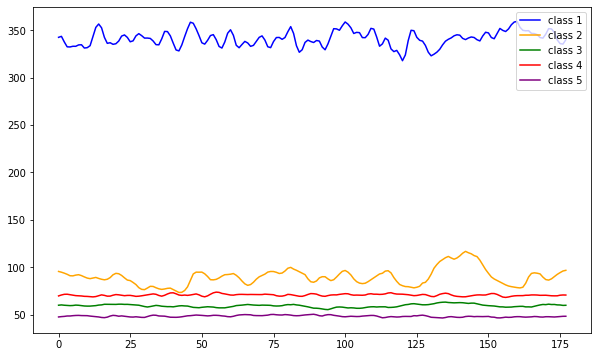

In [99]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.figure(figsize = (10, 6))
for i in range(number_of_classes):
    plt.plot(range(number_of_columns), std_by_classes.iloc[i,:], c = colors[i], label = 'class ' + str(i+1))
plt.legend(loc = 'upper right')

In [ ]:
ucitati raw datu i napraviti chunkove